# Import libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import cv2

# Upload vk test image from user profile

In [3]:
from PIL import Image
import requests
from io import BytesIO

In [4]:
url = 'https://sun9-west.userapi.com/sun9-8/s/v1/ig2/XyKRHpJun7KZpf4k0l9jxG0A9LrTMqABnjh5dGbHXNaqLCgTxq6lKk6x4odaly83nS-UDBWa9-r56wGeQrLdD0Q7.jpg?size=810x1080&quality=95&type=album'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img_matrix = np.array(img)

gray_image_user = cv2.cvtColor(img_matrix, cv2.COLOR_BGR2GRAY)

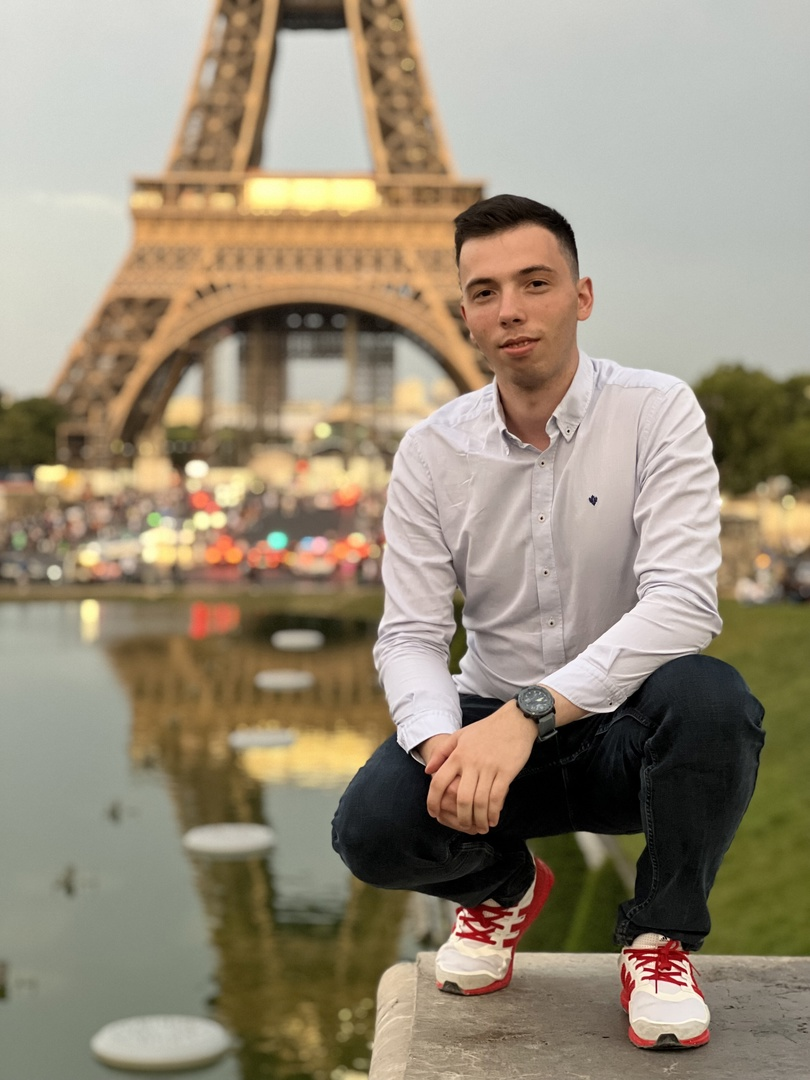

In [5]:
img

# Initial random data

In [6]:
# rng = np.random.default_rng(12345)
# temp_vector = [rng.integers(low=0, high=255, size=10) for i in range(10)]
# temp_vector = np.array(temp_vector)
# plt.imshow(temp_vector, interpolation='nearest')
# plt.title('random image via numpy')
# plt.show()

# Setup experiment filters

In [7]:
#naive filter

filter_naive = \
           [[+0.0, +0.0, +0.0], 
            [+0.0, +1.0, +0.0], 
            [+0.0, +0.0, +0.0]]

# filter for detecting vertical lines
filter_vertical = \
           [[+1.0, +0.0, -1.0], 
            [+1.0, +0.0, -1.0], 
            [+1.0, +0.0, -1.0]]

# filter for detecting horizontal lines
filter_horizontal = \
           [[+1.0, +1.0, +1.0], 
            [+0.0, +0.0, +0.0], 
            [-1.0, -1.0, -1.0]]


# filter for detecting obliquous lines
filter_obliquous = \
           [[-1.0, -1.0, +2.0], 
            [-1.0, +2.0, -1.0], 
            [+2.0, -1.0, -1.0]]

# filter for getting blurry images
filter_blur = \
           [[+1.0, +1.0, +1.0], 
            [+1.0, +1.0, +1.0], 
            [+1.0, +1.0, +1.0]]

# filter for getting sharper edges
filter_edges = \
           [[+1.0, +1.0, +1.0], 
            [+1.0, -7.0, +1.0], 
            [+1.0, +1.0, +1.0]]

In [8]:
filter_dict = {'filter_naive':filter_naive, 'filter_vertical':filter_vertical,
               'filter_horizontal':filter_horizontal, 'filter_obliquous':filter_obliquous,
               'filter_blur':filter_blur, 'filter_edges':filter_edges}

# Define convolution and show image function

In [9]:
def filter_function(filter_chosen, temp_vector):
    shape_image = temp_vector.shape
    
    if np.sum(filter_chosen) == 0:
        weight = 1.
    else:
        weight = 1 / np.sum(filter_chosen)
        
    i_transformed = np.copy(temp_vector)
    for x in range(1,shape_image[0]-1):
        for y in range(1,shape_image[1]-1):
            convolution = 0.0
            convolution = convolution + (temp_vector[x-1, y-1] * filter_chosen[0][0])
            convolution = convolution + (temp_vector[x-1, y] * filter_chosen[0][1])
            convolution = convolution + (temp_vector[x-1, y+1] * filter_chosen[0][2])
            convolution = convolution + (temp_vector[x, y-1] * filter_chosen[1][0])
            convolution = convolution + (temp_vector[x, y] * filter_chosen[1][1])
            convolution = convolution + (temp_vector[x, y+1] * filter_chosen[1][2])
            convolution = convolution + (temp_vector[x+1, y-1] * filter_chosen[2][0])
            convolution = convolution + (temp_vector[x+1, y] * filter_chosen[2][1])
            convolution = convolution + (temp_vector[x+1, y+1] * filter_chosen[2][2])
            convolution = convolution * weight
            if(convolution<0):
                convolution=0
            if(convolution>255):
                convolution=255
            i_transformed[x, y] = convolution
    return i_transformed

In [19]:
def show_image(image_vect, type_filter):
    plt.figure(figsize=(20, 10))
    plt.imshow(image_vect)
    plt.title(f'Transformed image via {type_filter}')
    plt.show()
    #plt.savefig(f'/home/alkesandr/jupyter_notebooks/OpenCV_experiments_images/samofalov_vk_filter_{type_filter}.png')
    cv2.imwrite(f'/home/alkesandr/jupyter_notebooks/OpenCV_experiments_images/samofalov_vk_filter_{type_filter}.jpg', image_vect)

In [20]:
# for i in list(filter_dict.keys()):
#     type_filter = filter_dict[i]
#     transformed_image = filter_function(type_filter, temp_vector)
#     print(transformed_image)
#     show_image(transformed_image, i)

# Run filter experiments

### filter_naive

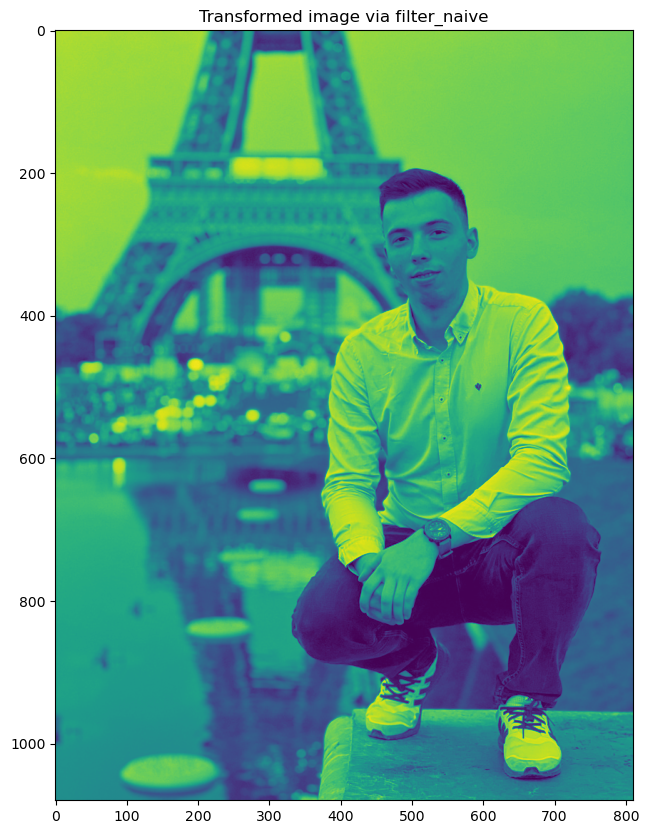

In [21]:
transformed_image_naive = filter_function(filter_naive, gray_image_user)
show_image(transformed_image_naive, 'filter_naive')

### filter_vertical

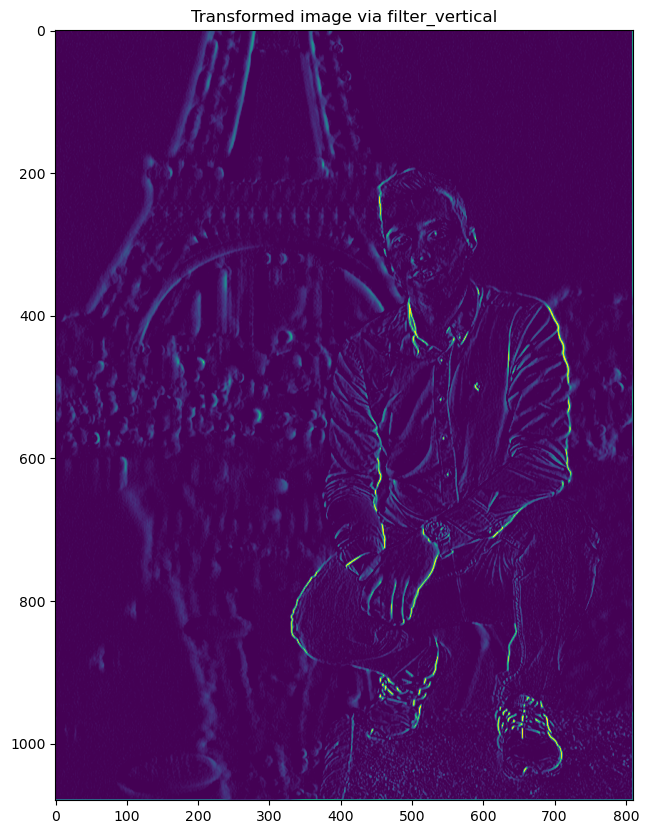

In [22]:
transformed_image_vertical = filter_function(filter_vertical, gray_image_user)
show_image(transformed_image_vertical, 'filter_vertical')

### filter_horizontal

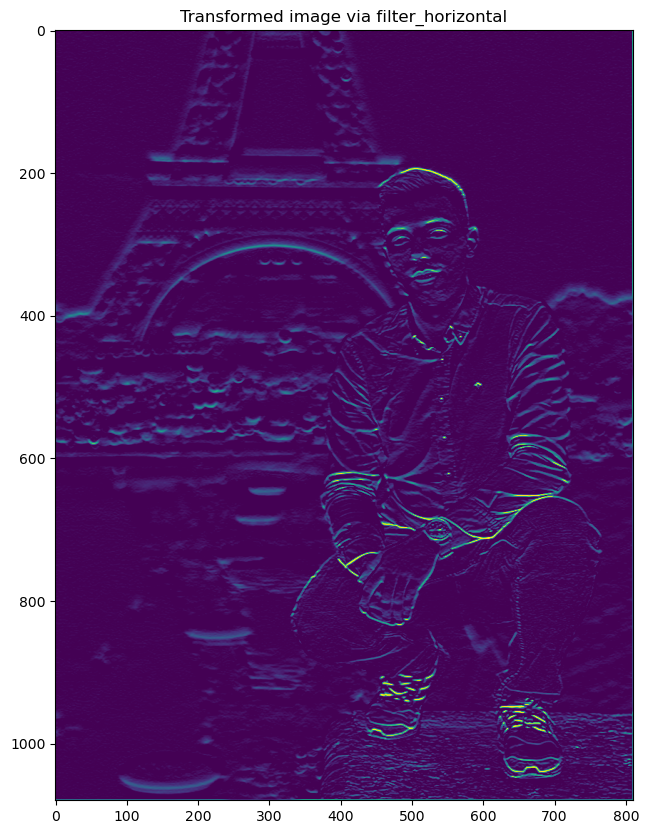

In [23]:
transformed_image_horizontal = filter_function(filter_horizontal, gray_image_user)
show_image(transformed_image_horizontal, 'filter_horizontal')

### filter_obliquous

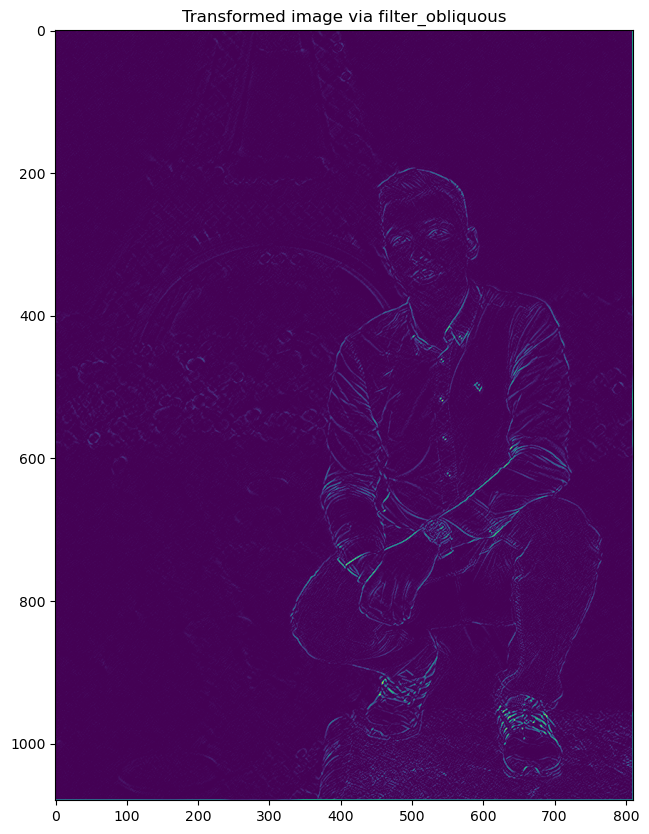

In [24]:
transformed_image_filter_obliquous = filter_function(filter_obliquous, gray_image_user)
show_image(transformed_image_filter_obliquous, 'filter_obliquous')

### filter_blur

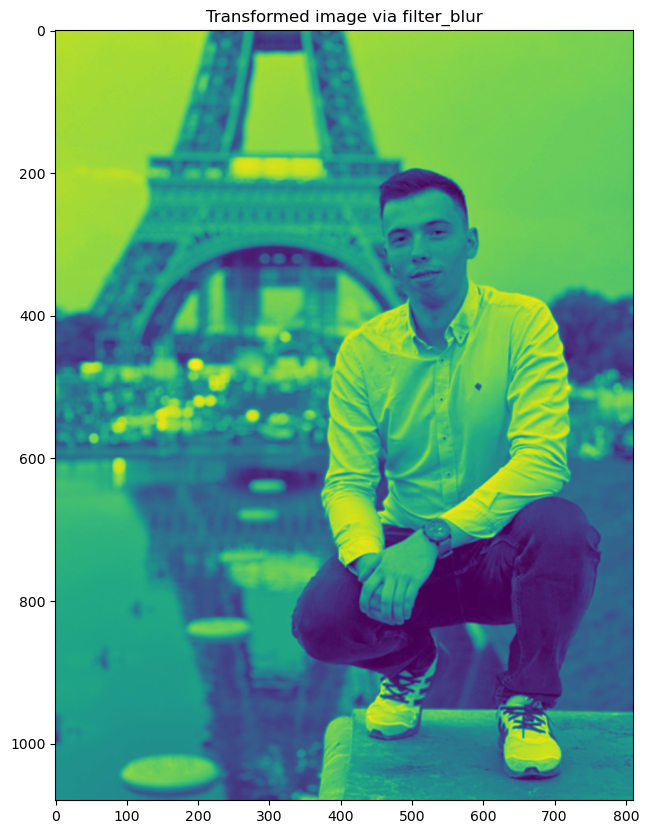

In [25]:
transformed_image_filter_blur = filter_function(filter_blur, gray_image_user)
show_image(transformed_image_filter_blur, 'filter_blur')

### filter_edges

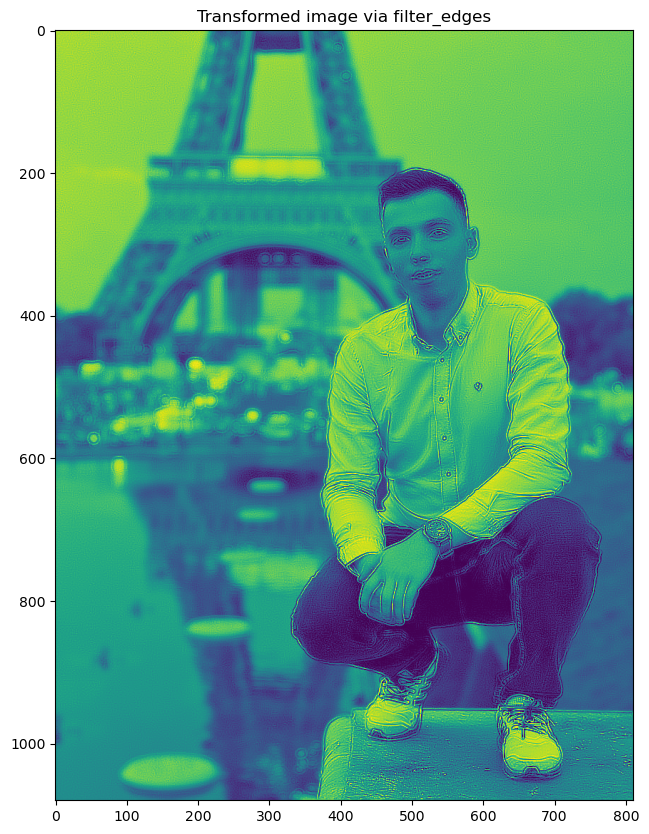

In [26]:
transformed_image_filter_edges = filter_function(filter_edges, gray_image_user)
show_image(transformed_image_filter_edges, 'filter_edges')

# Make 2 conv layers

In [28]:
# use filter_obliquous + filter_edges
transformed_image_filter_obliquous_edges = filter_function(filter_edges, transformed_image_filter_obliquous)

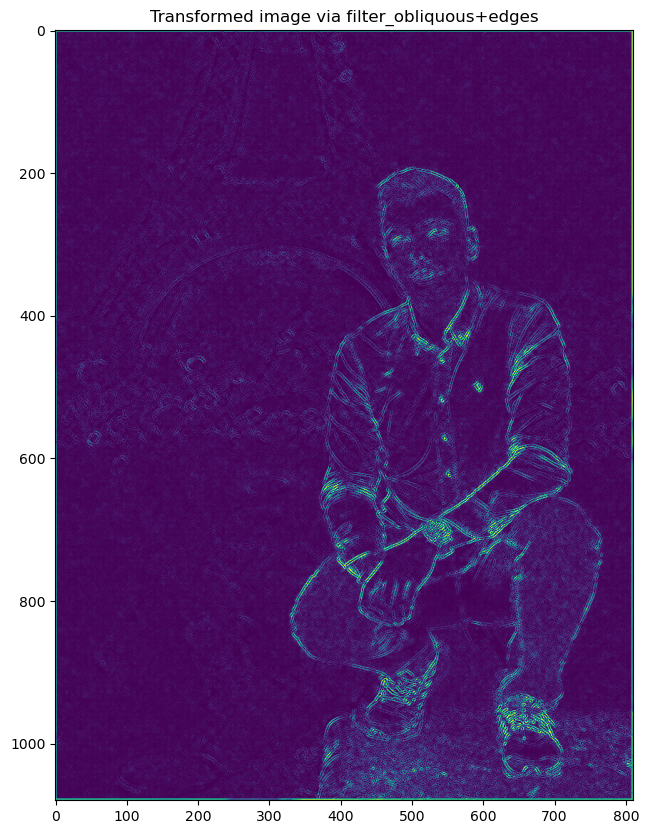

In [29]:
show_image(transformed_image_filter_obliquous_edges, 'filter_obliquous+edges')

# Make 3 conv layers

In [30]:
transformed_image_complex = filter_function(filter_blur, transformed_image_filter_obliquous_edges)

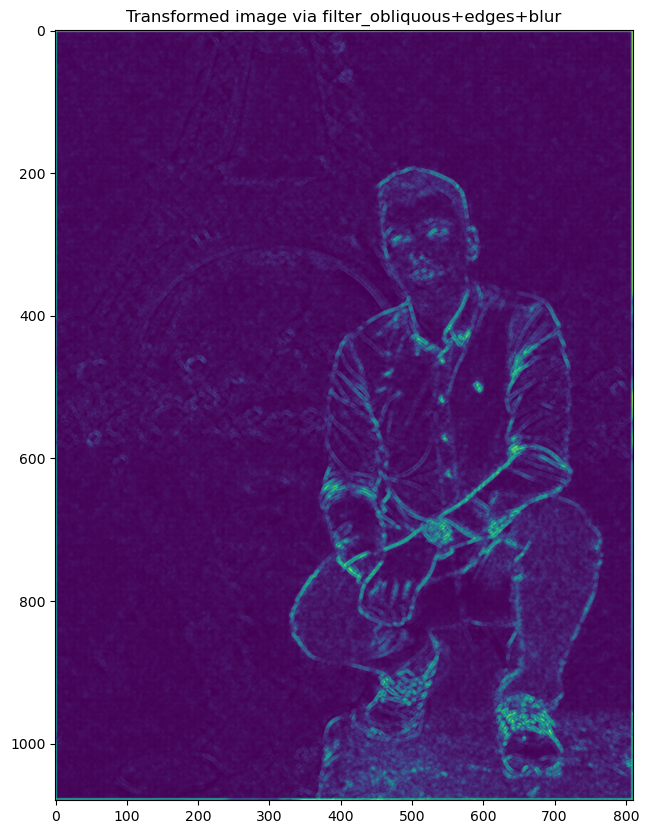

In [31]:
show_image(transformed_image_complex, 'filter_obliquous+edges+blur')

### Apply statistics hint
Filter all arrays with average value + 3 sigma helps to delete noisy from the image

In [61]:
avg_list = [np.average(transformed_image_complex[i]) for i in range(transformed_image_complex.shape[0])]
noise_level = np.average(avg_list) + 3*np.std(avg_list) #should be higher 0 and positive
print(noise_level)

36.68234934712928


In [62]:
for i in range(transformed_image_complex.shape[0]):
    for g in range(transformed_image_complex.shape[1]):
        if transformed_image_complex[i][g] < noise_level:
            value = 0
        else:
            value = transformed_image_complex[i][g]
        transformed_image_complex[i][g] = value
        del value

In [63]:
transformed_image_complex.shape

(1080, 810)

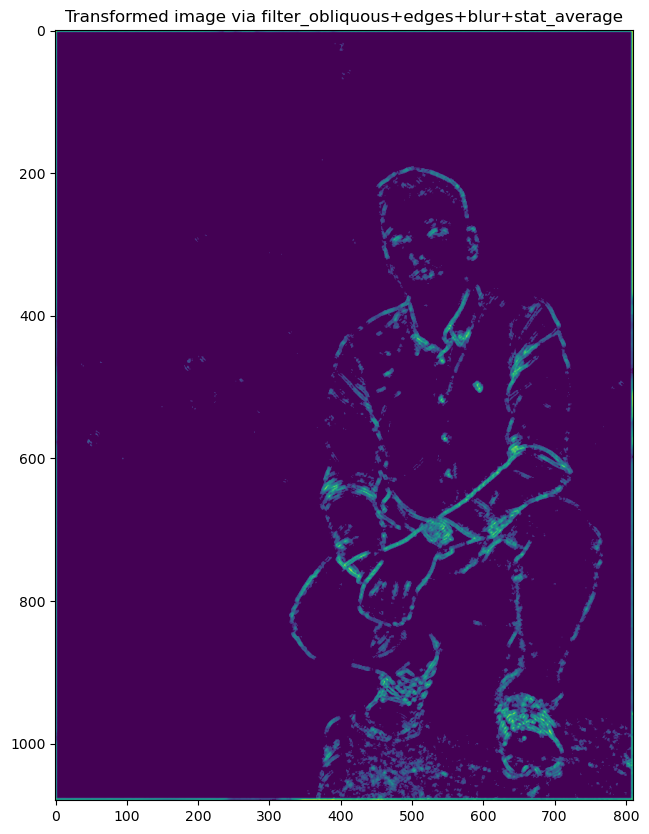

In [64]:
show_image(transformed_image_complex, 'filter_obliquous+edges+blur+stat_average')